<a href="https://colab.research.google.com/github/Pratikk003/Deep-learning/blob/main/Deep_learning_on_climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
data = pd.read_csv('climate_change.csv')
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [2]:
X = data[['Year', 'Month','MEI','CO2','N2O','CFC-11','CFC-12','TSI','Aerosols',]].values
y = data['Temp'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.1642 - mae: 0.3405 - val_loss: 0.0342 - val_mae: 0.1520
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0465 - mae: 0.1758 - val_loss: 0.0321 - val_mae: 0.1435
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0309 - mae: 0.1367 - val_loss: 0.0210 - val_mae: 0.1135
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - mae: 0.1097 - val_loss: 0.0137 - val_mae: 0.0942
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mae: 0.0919 - val_loss: 0.0152 - val_mae: 0.0942
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122 - mae: 0.0864 - val_loss: 0.0096 - val_mae: 0.0735
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mae: 0.0769 - val_loss: 0.0092 - val_mae: 0.0759
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0085 - mae: 0.0687 - val_loss: 0.0097 - val_mae: 0.0794
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - mae: 0.0694 - 

In [8]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0067 - mae: 0.0626
Test Mean Absolute Error: 0.07


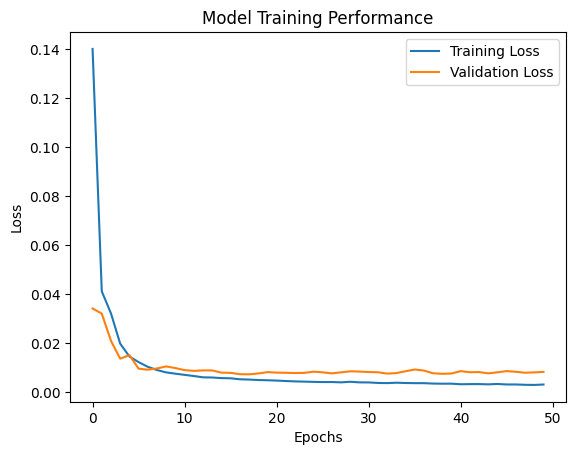

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [10]:
predictions = model.predict(X_test)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[ 0.40566593],
       [ 0.02517525],
       [ 0.25666258],
       [ 0.1557858 ],
       [-0.03280451],
       [ 0.13596576],
       [ 0.19298235],
       [ 0.42288804],
       [ 0.5357247 ],
       [ 0.13037764],
       [ 0.12364724],
       [ 0.30874223],
       [ 0.38161367],
       [ 0.40332305],
       [ 0.49265155],
       [ 0.3959942 ],
       [ 0.16603953],
       [ 0.19632092],
       [ 0.17257711],
       [ 0.3283453 ],
       [ 0.16588357],
       [ 0.11717724],
       [ 0.23739839],
       [ 0.36987677],
       [ 0.21656582],
       [ 0.45929855],
       [-0.03705513],
       [ 0.04445259],
       [ 0.3965272 ],
       [ 0.43054053],
       [ 0.06816333],
       [ 0.15627408],
       [ 0.3228072 ],
       [ 0.40800568],
       [ 0.22595164],
       [ 0.04119774],
       [ 0.14782736],
       [-0.04080646],
       [ 0.40246063],
       [ 0.2526234 ],
       [ 0.02925258],
       [-0.0338647 ],
       [ 0.6197137 ],
       [ 0.42099947],
       [ 0.3610685 ],
       [ 0

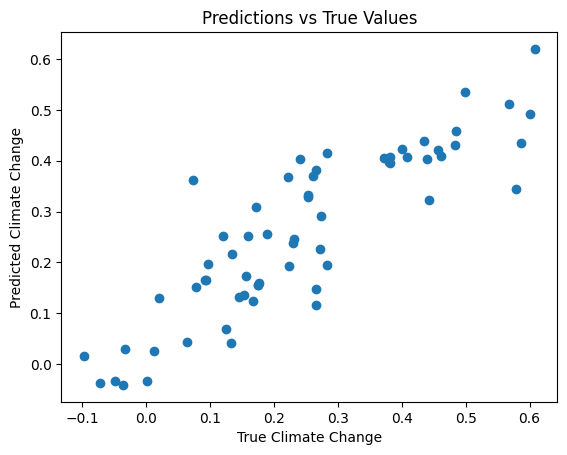

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel('True Climate Change')
plt.ylabel('Predicted Climate Change')
plt.title('Predictions vs True Values')
plt.show()